# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from config import api_key
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


4560e014c81d2a2224a6de163866895a


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# pprint(url)
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url)
        city_weather_json = city_weather.json()
        # print(city_weather)
    #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp =  city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json[ "sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | florence
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port glaud
City not found. Skipping...
Processing Record 9 of Set 1 | mareeba
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | geraldton
Processing Record 12 of Set 1 | wotho
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | tantoyuca
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()


City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,14.33,86,100,8.69,ZA,1724704131
1,florence,43.7667,11.2500,29.82,56,0,3.60,IT,1724704132
2,bethel,41.3712,-73.4140,28.92,55,0,4.63,US,1724703914
3,port-aux-francais,-49.3500,70.2167,2.85,73,2,12.35,TF,1724704135
4,bilibino,68.0546,166.4372,9.02,60,90,1.25,RU,1724704136


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,86,100,8.69,ZA,1724704131
1,florence,43.7667,11.2500,29.82,56,0,3.60,IT,1724704132
2,bethel,41.3712,-73.4140,28.92,55,0,4.63,US,1724703914
3,port-aux-francais,-49.3500,70.2167,2.85,73,2,12.35,TF,1724704135
4,bilibino,68.0546,166.4372,9.02,60,90,1.25,RU,1724704136


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

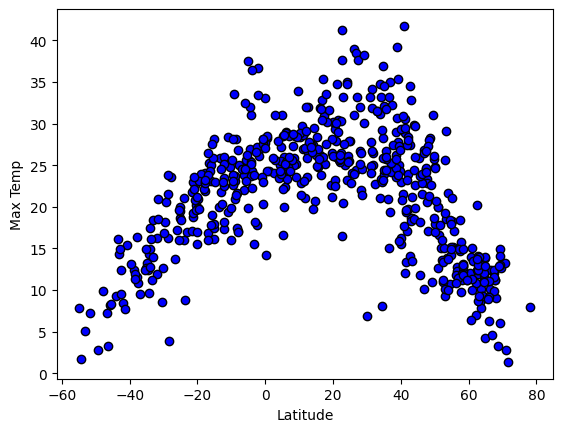

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

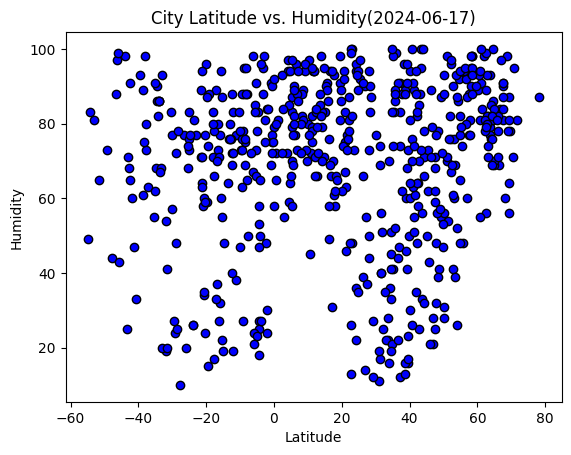

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity(2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

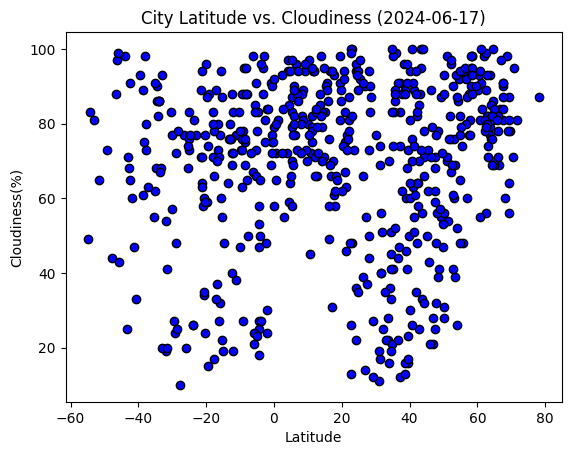

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

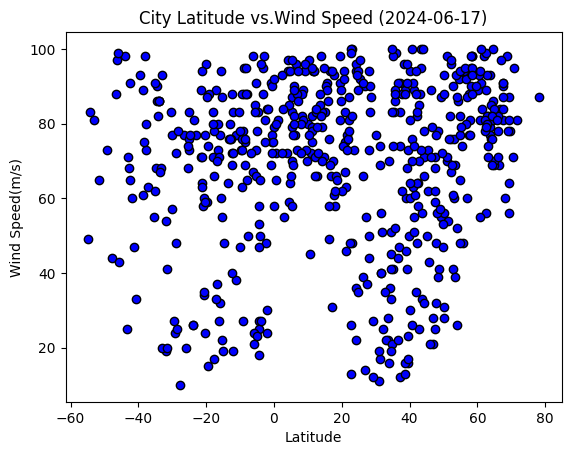

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,9.73,76,40,0.00,US,1724698279
2,tazacorte,28.6290,-17.9293,26.19,81,75,6.17,ES,1724698358
7,anadyr,64.7500,177.4833,3.28,93,20,5.00,RU,1724698589
9,ilulissat,69.2167,-51.1000,6.01,87,75,3.09,GL,1724698418
11,san patricio,28.0170,-97.5169,32.97,45,100,6.17,US,1724698593


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,14.33,86,100,8.69,ZA,1724704131
3,port-aux-francais,-49.3500,70.2167,2.85,73,2,12.35,TF,1724704135
5,port mathurin,-19.6833,63.4167,20.96,59,19,12.58,MU,1724704137
6,grytviken,-54.2811,-36.5092,1.76,83,64,3.62,GS,1724704138
7,mareeba,-17.0000,145.4333,16.80,89,47,1.03,AU,1724704141


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4939210294661592


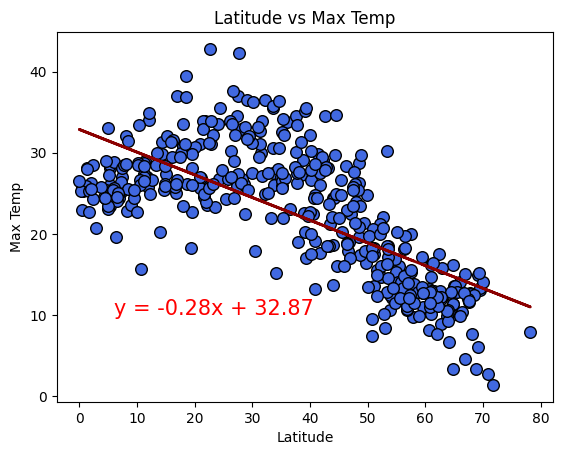

In [20]:
# Linear regression on Northern Hemisphere
# # Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")


# Show plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (185,) and (581,)

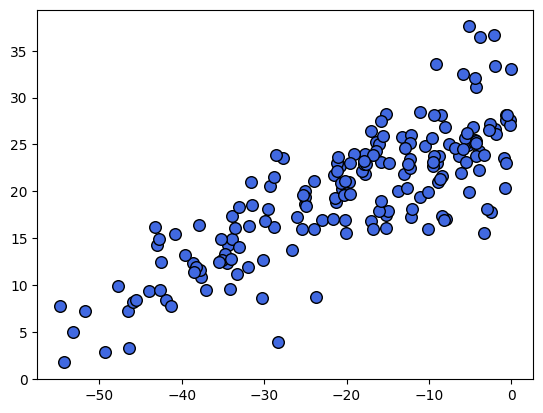

In [16]:
# Linear regression on Southern Hemisphere
# # Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.4939210294661592


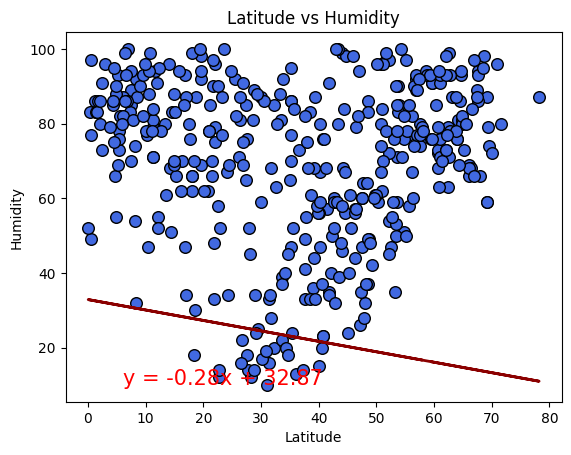

In [22]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")


# Show plot
plt.show()

The r^2-value is: 0.6668586079638316


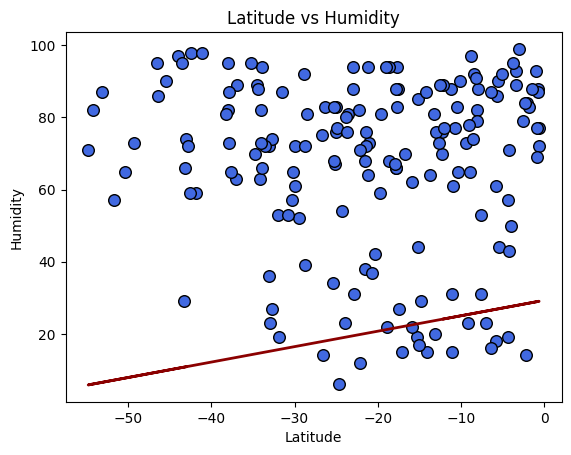

In [32]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig8.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.4939210294661592


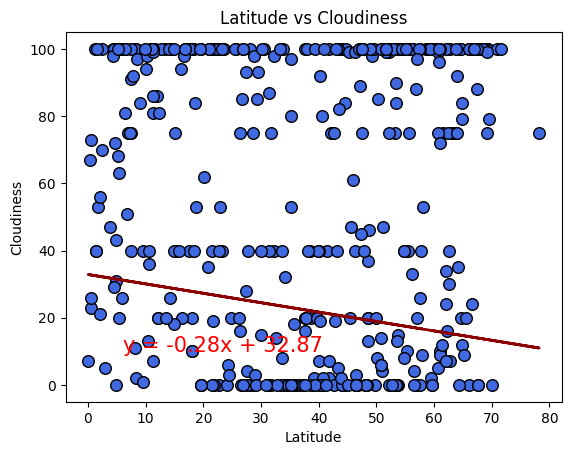

In [23]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig9.png")


# Show plot
plt.show()

The r^2-value is: 0.6668586079638316


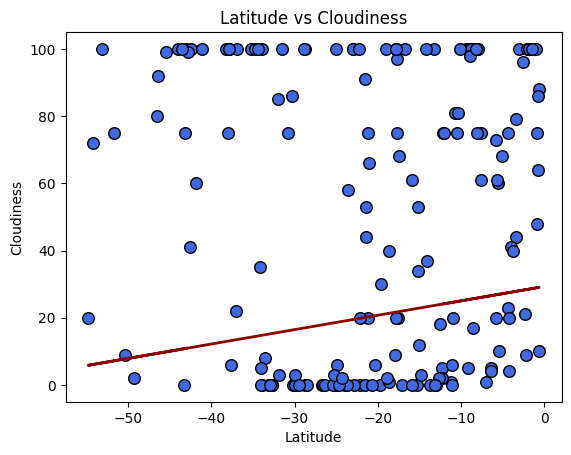

In [33]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig10.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.4939210294661592


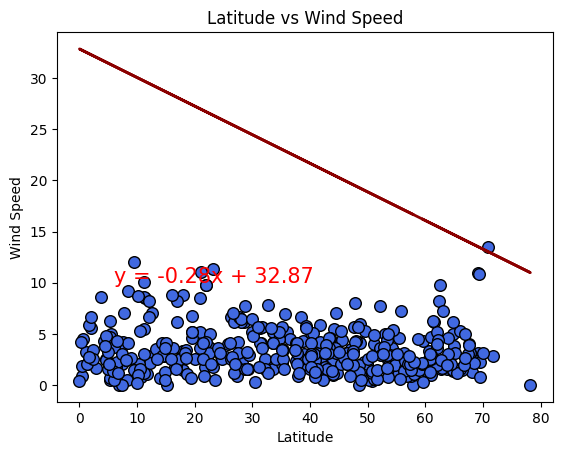

In [25]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig11.png")


# Show plot
plt.show()

The r^2-value is: 0.6668586079638316


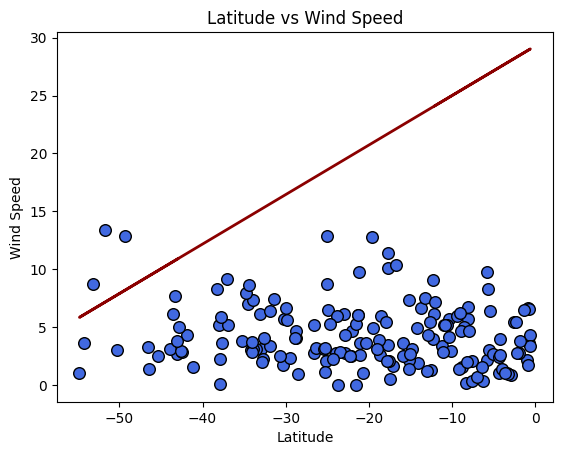

In [34]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"The r^2-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_data/Fig7.png")


# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE